# **Taller No. 3: Segmentación por agrupamiento (*clustering*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
3. [**Introducción**](#id1)
3. [**Método**](#id2)
4. [**Código**](#id3)
3. [**Resultados**](#id4)
4. [**Conclusión y discusión**](#id5)


## **1. Introducción**<a name="id1"></a>
## **2. Método**<a name="id2"></a>
## **3. Código**<a name="id3"></a>
## **4. Resultados**<a name="id4"></a>
## **5. Conclusión y discusión**<a name="id5"></a>

In [8]:
import utils.segmentation as seg
import matplotlib.pyplot as plt

In [9]:
url = "https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2004/images/lotus.png?raw=true"
img = seg.download_image(url)

The shape of the image is: (480, 720, 3)


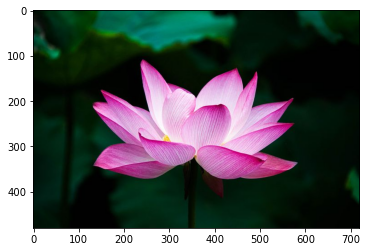

In [10]:
plt.imshow(img)
plt.show()

Coordenadas aleatorias  367 284
Pixel  [ 0 38 14]
Coordenadas aleatorias  295 9
Pixel  [ 0 29 13]
Coordenadas aleatorias  181 142
Pixel  [2 4 0]
C  [(0, 38, 14), (0, 29, 13), (2, 4, 0)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6
Iteracion actual -> 7
Iteracion actual -> 8
Iteracion actual -> 9


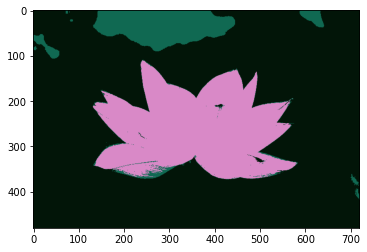

[(217, 137, 199), (16, 105, 82), (2, 21, 8)]

In [11]:
seg.kmeans(3, img, 25, 5, True, [])

C  [(31, 32, 27), (179, 176, 221), (87, 125, 128)]
Iteracion actual -> 1
Iteracion actual -> 2
Iteracion actual -> 3
Iteracion actual -> 4
Iteracion actual -> 5
Iteracion actual -> 6
Iteracion actual -> 7
Iteracion actual -> 8
Iteracion actual -> 9


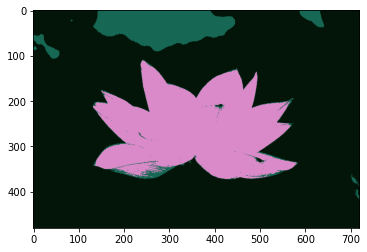

In [12]:
segmented_imgs = seg.kmeans(3, img, 25, 5, False, [(31, 32, 27), (179, 176, 221), (87, 125, 128)])